# Pre-requistes

In [2]:
PATH = "/home/paperspace/data/seeds/" # cloud
#PATH = "/Users/vinod/programming/DL/data/dog-breeds/"

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [24]:
arch=resnet50
bs = 34
size=64

In [25]:
!date

Sat Feb  3 10:47:47 EST 2018


## Get data

### Directory based structure

### Let's take a look at the data, especially file sizes

In [26]:
def get_tfms(f_model, size): return tfms_from_model(f_model, size)

def get_aug_tfms(f_model, size): return tfms_from_model(f_model, size, aug_tfms=transforms_side_on, max_zoom=1.1)

def get_data_from_csv(f_model, sz, tfms):
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

def get_data_from_dir(f_mode, sz, tfms):
    return ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')

In [27]:
data = get_data_from_dir(arch, size, get_tfms(arch, size))

In [28]:
fn = PATH + data.trn_ds.fnames[0]; fn

'/home/paperspace/data/seeds/train/Black-grass/983663c56.png'

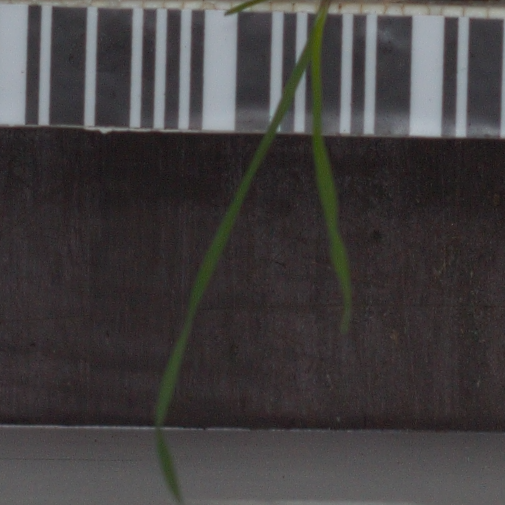

In [29]:
img = PIL.Image.open(fn); img

In [30]:
img.size

(505, 505)

#### Image size

Most imagenets are trained on 224 x 224 or 299 x 299. Lets make a dictionary comprehension to store all the names of the files to the size of the files. This will be important for **memory and size consideration**

In [31]:
size_d = {file: PIL.Image.open(PATH+file).size for file in data.trn_ds.fnames}

In [32]:
row_size, col_size = list(zip(*size_d.values()))

In [33]:
row_size = np.array(row_size); col_size = np.array(col_size)

In [34]:
row_size.max()

3991

In [35]:
row_size[:2]

array([505, 983])

#### Distribution of the image sizes

(array([2908., 1034.,  237.,   71.,   14.,    5.,    2.,    2.,    0.,    2.]),
 array([  49. ,  443.2,  837.4, 1231.6, 1625.8, 2020. , 2414.2, 2808.4, 3202.6, 3596.8, 3991. ]),
 <a list of 10 Patch objects>)

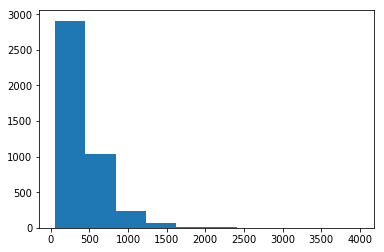

In [36]:
plt.hist(row_size)

(array([362., 678., 687., 294., 160., 152., 145., 264., 211., 226.]),
 array([ 49.,  94., 139., 184., 229., 274., 319., 364., 409., 454., 499.]),
 <a list of 10 Patch objects>)

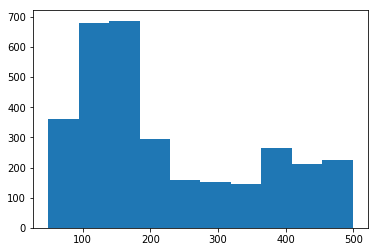

In [46]:
plt.hist(row_size[row_size < 500])

(array([2638., 1181.,  293.,  112.,   33.,   11.,    2.,    2.,    0.,    3.]),
 array([  49. ,  389.8,  730.6, 1071.4, 1412.2, 1753. , 2093.8, 2434.6, 2775.4, 3116.2, 3457. ]),
 <a list of 10 Patch objects>)

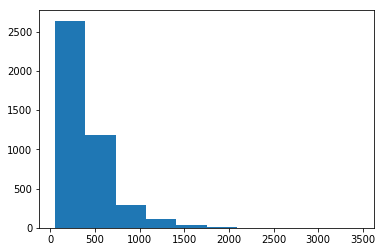

In [38]:
plt.hist(col_size)

(array([1077.,  299.,  126.,   47.,   11.,    8.,    2.,    1.,    1.,    2.]),
 array([ 401. ,  706.6, 1012.2, 1317.8, 1623.4, 1929. , 2234.6, 2540.2, 2845.8, 3151.4, 3457. ]),
 <a list of 10 Patch objects>)

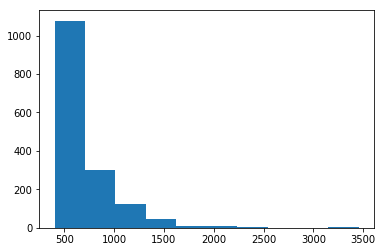

In [43]:
plt.hist(col_size[col_size < 500])

#### Classes

In [40]:
len(data.trn_ds), len(data.test_ds)

(4275, 794)

In [23]:
len(data.classes), data.classes[:2]

(12, ['Black-grass', 'Charlock'])